# Lab 5 Constructing CNNs with Keras

In this lab, we will look at constructing convolutional networks with Keras. Keras drastically simplifies the process of constructing a network by using predefined network models and layers.

After installing Keras via `pip install keras` restart your kernel. We will start by building a multilayer perceptron, and then move on to CNNs. Our first data set will be our old friend the MNIST dataset. Lets build a perceptron with one deep layer:

<img width = 500 src = "https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

We will use this to classify the MNIST dataset. First, we load in MNIST, normalize the X pixel intensities to be between 0 and 1 (this works better with our activation functions) and then encode the labels $Y$ as one-hot encoded categorical variables. We use the `keras.utils` class to do the one-hot encoding, but you could use `pandas.get_dummies` as well.

This tutorial follows closely the excellent tutorials https://nextjournal.com/gkoehler/digit-recognition-with-keras and https://colab.research.google.com/github/csc-training/intro-to-dl/blob/master/day1/keras-mnist-mlp.ipynb#scrollTo=-fGvYAbhVADs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.utils import to_categorical

## MNIST:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

NUM_LABELS = 10

## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# one-hot encoding:
Y_train = to_categorical(y_train, NUM_LABELS)
Y_test = to_categorical(y_test, NUM_LABELS)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step

MNIST data loaded: train: 60000 test: 10000
x_train: (60000, 28, 28)
X_train: (60000, 784)
y_train: (60000,)
Y_train: (60000, 10)


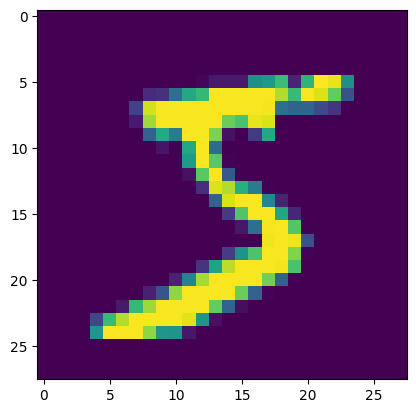

In [ ]:
plt.imshow(x_train[0,:,:])

Recall that to build a sequential model in Keras we import the `sequential` class from `keras.model` and then the types of layers we will use from `keras.labels`. In this case we will be using __dense__ layer and __activation__ layers.

We then define a new model with `model = Sequential()`. We add layers in sequence with `model.add(layer)` and Keras takes care of the connects for us:


<div class="alert alert-block alert-info">
__Dense__ implements the operation: __output = activation(dot(input, kernel) + bias)__ where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

[Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
</div>

## Build a sequential model in Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Activation('softmax'))

That's it, we've constructed out model. To compile it we use `model.compile`. We will use the Adam optimizer, which automatically sets a different learning schedule for each weight. For more information about Adam, see [Jason Brownlee's excelent post](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) or [the original paper of Kingma and Ba](https://arxiv.org/abs/1412.6980).

To train the model, use

`model.fit(X_train, Y_train,
          batch_size=, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))`

* `X_train` is the whole set of training data.
* `Y_train` is the whole set of label data.
* `batch_size` is size of each training minibatch. Remember that 1 is __stochastic gradient decent__ while 60000 (the size of the whole data set) would be __gradient decent__.
* `verbose` sets how much information to output during fitting. 0 = silent, 1 = progress bar, 2 = one line per epoch.
* `validation_data=()` specifies data to validate on after each training epoch.

We will save the output of the training in a variable called `history` for later viewing.

https://keras.io/models/model/

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.7372 - accuracy: 0.7441 - val_loss: 0.6030 - val_accuracy: 0.7743
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5761 - accuracy: 0.7800 - val_loss: 0.5599 - val_accuracy: 0.7824
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5399 - accuracy: 0.7875 - val_loss: 0.5413 - val_accuracy: 0.7842
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5189 - accuracy: 0.7918 - val_loss: 0.5309 - val_accuracy: 0.7873
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5044 - accuracy: 0.7947 - val_loss: 0.5241 - val_accuracy: 0.7891
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4939 - accuracy: 0.7967 - val_loss: 0.5249 - val_accuracy: 0.7887
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4861 - accuracy: 0.7980 - val_loss: 0.5185 - val_accuracy: 0.7899
Epoch 

#### Saving weights with Keras

Unlike pure tensorflow, Keras will track the tensorflow session by default, including keeping the model alive in a session for us. To save out the weights, we use `model.save(FILE_NAME)`. The weights can be recovered by using `model.load_weights`. Be warned: you have to build a model with the same architecture first and then load the weights into it.

In [ ]:
# saving the model
import os

SAVE_DIR = "./"
MODEL_NAME = 'keras_mnist.h5'
model_path = os.path.join(SAVE_DIR, MODEL_NAME)

model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./keras_mnist.h5 


#### Visualizing Training

Keras also saves the models training history. History store the training accuracy, the validation accuracy and the training loss and the validation loss. Below, we plot them against the epoch number

In [ ]:
#history.history

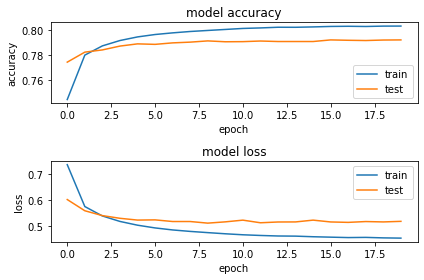

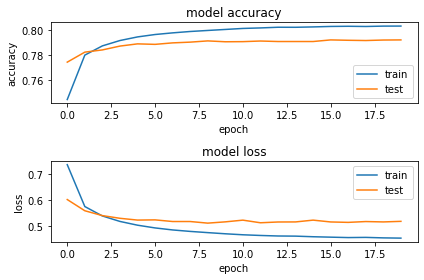

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Convolutions

Before we start constructing a convolution network, lets take a moment to explore convolutions themselves to see what kinds of downstream layers our convolutions are creating.



(427, 640, 3)


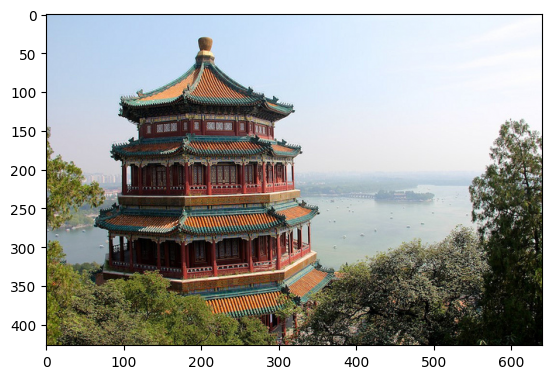

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt
import tensorflow as tf

china = load_sample_image("china.jpg") / 255
print(china.shape)

plt.imshow(china)

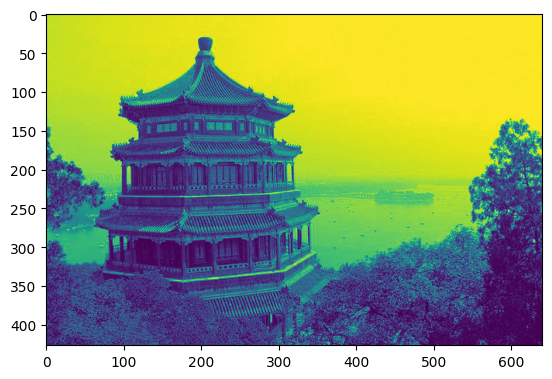

In [ ]:
plt.imshow(china[:,:,2])

The picture we loaded is a color picture, and so has 3 channels (Red, Green, Blue). The shape tells us that the color channels are indexed by the third dimension of the array, and we can plot each channel separately:

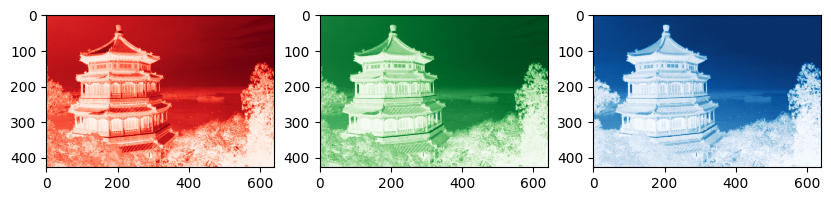

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10, 5))

axes[0].imshow(china[:,:,0], cmap="Reds")
axes[1].imshow(china[:,:,1], cmap="Greens")
axes[2].imshow(china[:,:,2], cmap="Blues")

Given an $n\times m$ matrix $M$, a convolution passes over the image taking the dot product of each $n\times m$ rectangle with the weights of the matrix.

<img width=600px src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L12Conv1.png">

Lets looks at some examples: The matrix

$$
M= \left[
\begin{matrix}
0 &-1& 0
\\
0 & 0 & 0
\\
0&1&0
\end{matrix}
\right]
$$

is a horizontal edge detector, since the convolution of $M$ with a $3\times 3$ square of pixels is 0 if the intensity of the top central pixel is the same as the bottom. It only has a large value if the pixel intensity has changed drastically in the vertical direction. Given a convolution matrix like $M$, tensorflow's `tf.nn.conv2d` will compute the convolution for the entire image.

In [ ]:
channels = 3
M = np.zeros([3,3,channels])
M[0,1,:] = -1
M[2,1,:] = 1
M

array([[[ 0.,  0.,  0.],
        [-1., -1., -1.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 0.,  0.,  0.]]])

In [ ]:
channels = 3    # Since we're using RGB data

M = np.zeros([3,3,channels])

M[0,1,:] = -1     # Set the top ceter element to -1 for all 3 matricies
M[2,1,:] = 1      # Set the bottom ceter element to 1 for all 3 matricies
M[:,:,0]

array([[ 0., -1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.]])

We will now use scipy's ndimage library to convolve the 3d image. There is of course a native tensorflow way to do this (or you could write your own convolve function, it's fairly straight forward) but for just looking, this is the simplest.

<ipython-input-6-91b5400f018e>:6: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  conv = ndimage.filters.convolve(china, M)


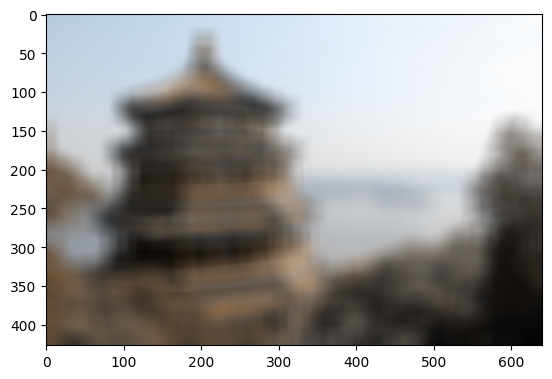

In [ ]:
from scipy import ndimage

channels = 3
M = np.ones([30,30,channels])/(3*30*30)  # Bluring

conv = ndimage.filters.convolve(china, M)
plt.imshow(conv)

Similar to the vertical filter, a horizontal edge detector can be constructed from

$$
H= \left[
\begin{matrix}
0 &0& 0
\\
-1 & 0 & 1
\\
0&0&0
\end{matrix}
\right]
$$

Build out the edge detector below:

Edge detectors can also detect other kinds of features. For example, here is a $5\times 5$ angle detector:


$$
G= \left[
\begin{matrix}
0 &0& 0 & 0 & 0
\\
0 &-1& -1 & -1 & -1
\\
0 &-1& 1 & 1 & 1
\\
0 &-1& 1 & 0 & 0
\\
0 &-1& 1 & 0 & 0
\end{matrix}
\right]
$$


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 0.  0.  0.  0.  0.]
 [ 0. -1. -1. -1. -1.]
 [ 0. -1.  1.  1.  1.]
 [ 0. -1.  1.  0.  0.]
 [ 0. -1.  1.  0.  0.]]


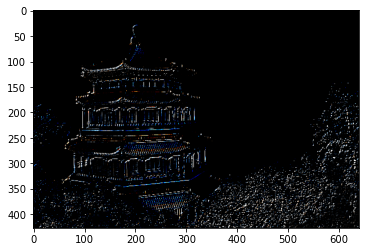

In [ ]:
channels = 3    # Since we're using RGB data

G = np.zeros([5,5,channels])

G[1,1:5,:] = -1
G[1:5,1,:] = -1
G[2,2:5,:] = 1
G[2:5,2,:] = 1
print(G[:,:,0])

conv = ndimage.filters.convolve(china, G)
plt.imshow(conv)

And a Guassian blurring matrix:

$$
G = \left[\begin{matrix}
0.07& 0.13& 0.07\\
0.13& 0.20& 0.13\\
0.07& 0.13& 0.07
\end{matrix}\right]
$$

In [ ]:
B = np.zeros([3,3,channels])
C = .25*np.array([0.07, 0.13, 0.07,
0.13, 0.20, 0.13,
0.07, 0.13, 0.07]).reshape(3,3)

B[:,:,0] = B[:,:,1] = B[:,:,2] = C

B[:,:,1]

array([[0.0175, 0.0325, 0.0175],
       [0.0325, 0.05  , 0.0325],
       [0.0175, 0.0325, 0.0175]])

<ipython-input-8-c627b88adb1f>:1: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  conv = ndimage.filters.convolve(china, B)


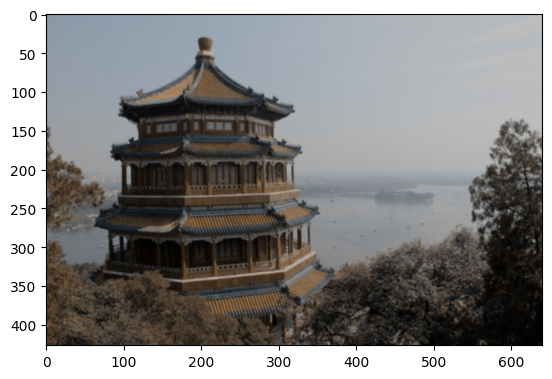

In [ ]:
conv = ndimage.filters.convolve(china, B)
plt.imshow(conv)

# Convolutional Neural Networks

Lets try out our perceptron network on something a little more complicated. The fashion MNIST dataset has a very similar structure to MNIST except that instead of simple hand written digits it contains $28\times 28$ images of items of clothing:

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">

Here is a nonlinear 3 dimensional projection of the $28\times 28$ dimensional dataset using TSNE, courtesy of the datasets home repo (https://github.com/zalandoresearch/fashion-mnist)



We load it as below and process it with the same code as before. Take a moment to poke around the dataset before processing it, the labels are

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


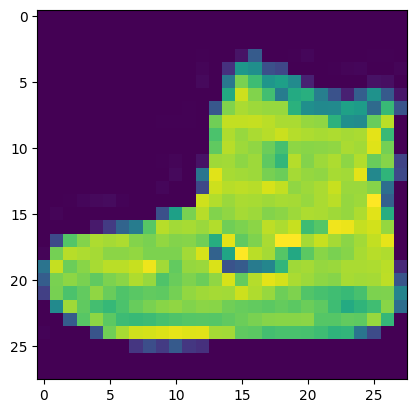

In [ ]:
plt.imshow(x_train[0])

Processing the data:

In [ ]:
NUM_LABELS = 10

## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# one-hot encoding:
Y_train = to_categorical(y_train, NUM_LABELS)
Y_test = to_categorical(y_test, NUM_LABELS)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
x_train: (60000, 28, 28)
X_train: (60000, 784)
y_train: (60000,)
Y_train: (60000, 10)


Now, try running the perceptron network about and note the validation error, you may need to increase the number of epochs to get reasonable results.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 1.1299 - accuracy: 0.6316 - val_loss: 1.0618 - val_accuracy: 0.6373
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 1.0170 - accuracy: 0.6690 - val_loss: 1.0580 - val_accuracy: 0.6492
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.9824 - accuracy: 0.6786 - val_loss: 0.9990 - val_accuracy: 0.6894
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.9622 - accuracy: 0.6879 - val_loss: 0.9995 - val_accuracy: 0.6673
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.9462 - accuracy: 0.6915 - val_loss: 0.9744 - val_accuracy: 0.6799
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.9346 - accuracy: 0.6955 - val_loss: 0.9736 - val_accuracy: 0.6680
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.9241 - accuracy: 0.7001 - val_loss: 0.9653 - val_accuracy: 0.6834
Epoc

#### Building a CNN

My error on the MLP never capped 82%, even with 100 epochs. Can we do better with a CNN? Recall that CNN's are comprised of stacks of convolution layers, activation layers, pooling layers and finally a flattening layer:

<table bgcolor="#fafafa"><tr>
    <td>__Convolution Layer__</td><td><img width=400 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5ConvLayer.PNG">
    </tr>
    <td>__Pooling Layer__</td><td><img width=300 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5PoolingLayer.PNG">
    </tr><tr>
    <td>__Flattening Layer__</td><td><img width=100 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5FlatteningLayer.PNG">
    </tr></table>
    
A convolution layer is defined with    
    
    `Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation='relu')`
                 
Where

* `nb_filters` number of convolution filters.
* `kernel_size` size of each filter, say [5,5] for a $5\times 5$ filter.
* `padding` When we convolve, we tend to lower the image size. We can choose to pad the image back to its original size or not.
* `input_shape` shape of the inputed training data, only required for the first layer.
* `activation` the activation layer following the convolution layer.

For a pooling layer we only specify the pool size:

* `MaxPooling2D(pool_size=pool_size)` where `pool_size = [2,2]` down-samples by 2 in each direction.

After we down-sample enough, we flatten and feed the network into a dense layer to do the fitting. The final architecture looks like the cartoon from class:

<img width= 700 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L12CNN2.PNG">

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## We renormalize the training data since we do not need to flatten it
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

## We have to add an extra dimension to allow for the multiple images we will be creating
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = to_categorical(y_train, NUM_LABELS)
Y_test = to_categorical(y_test, NUM_LABELS)

## Construct CNN Network

In [ ]:
## Construct Network
model = Sequential()
model.add(Conv2D(32, (7,7), padding = 'valid', input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## We renormalize the training data since we do not need to flatten it
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

## We have to add an extra dimension to allow for the multiple images we will be creating
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = to_categorical(y_train, NUM_LABELS)
Y_test = to_categorical(y_test, NUM_LABELS)

Now, lets create our model. Our convolution layers will have $3\times 3$ filters followed by downsampling.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(28, 28,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_LABELS, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 512)              

Lets fit, and plot the results. Each epoch will take 10-100 s depending on your processor.

In [ ]:
epochs = 5

history = model.fit(X_train,
                    Y_train,
                    epochs=epochs,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 53s 111ms/step - loss: 0.7814 - accuracy: 0.7144 - val_loss: 0.5117 - val_accuracy: 0.8123
Epoch 2/5
469/469 [==============================] - 49s 103ms/step - loss: 0.5139 - accuracy: 0.8155 - val_loss: 0.4201 - val_accuracy: 0.8459
Epoch 3/5
469/469 [==============================] - 48s 102ms/step - loss: 0.4444 - accuracy: 0.8406 - val_loss: 0.3901 - val_accuracy: 0.8566
Epoch 4/5
469/469 [==============================] - 48s 103ms/step - loss: 0.4053 - accuracy: 0.8530 - val_loss: 0.3625 - val_accuracy: 0.8685
Epoch 5/5
469/469 [==============================] - 48s 103ms/step - loss: 0.3804 - accuracy: 0.8638 - val_loss: 0.3416 - val_accuracy: 0.8758


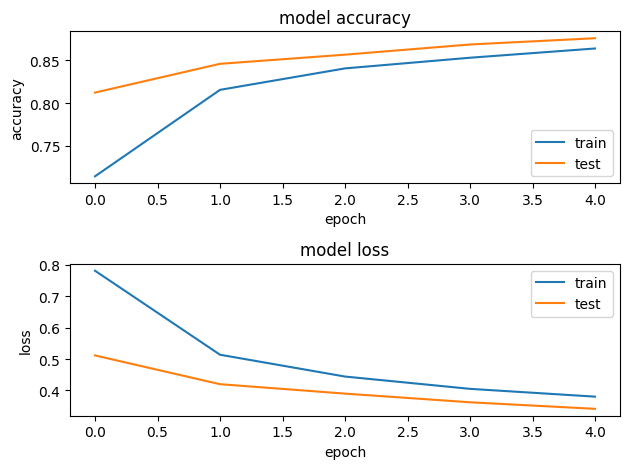

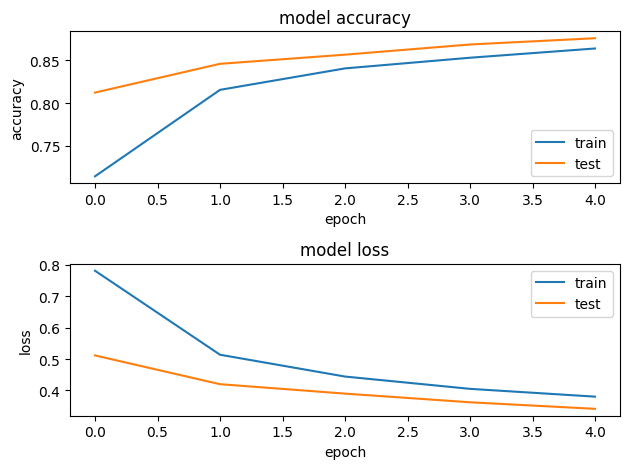

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Understanding the model

There are two things we would like to understand about a CNN: __what is it doing__ and __what is it not doing__? To answer the first question let open up the box a bit and see what the first few convolution kernels look like.

The `model.layers[]` array gives a list of handlers for the model layers in the order given by summary. Note that you can also name your layers and call them that way. We then use `layer.get_weights()` to return the convolution and bias weights for each of the 32 kernel layers.

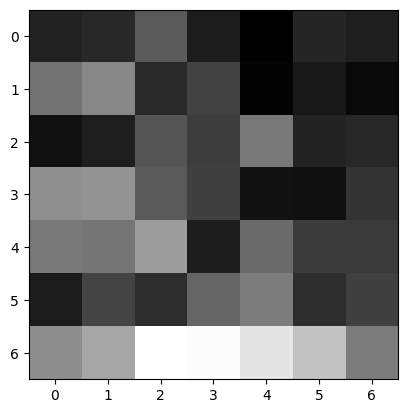

In [ ]:
weights, biases = model.layers[0].get_weights()
plt.imshow(weights[:,:,0,1],cmap="Greys")

(7, 7, 1, 32)


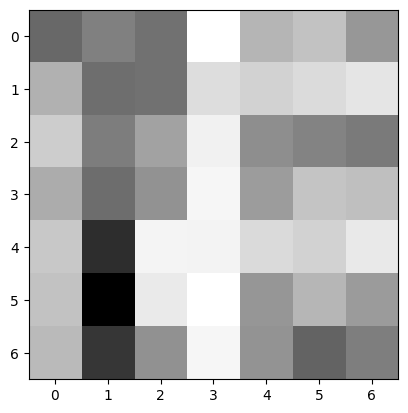

In [ ]:
weights, biases = model.layers[0].get_weights()
print(weights.shape)

plt.imshow(weights[:,:,0,9],cmap="Greys")

#### Exercise:

Display all of the kernels in a grid. In addition, normalize the color scheme so that each image uses the same scheme.

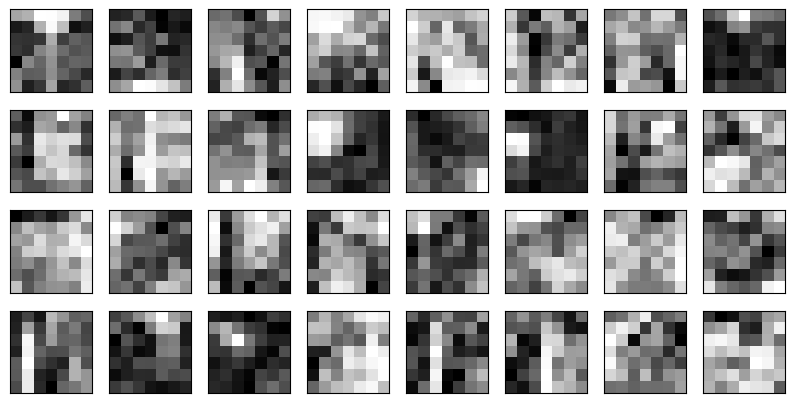

In [ ]:
f, axes = plt.subplots(4,8, figsize=(10,5))

axes = axes.reshape(-1)
for i in range(32):
    axes[i].imshow(weights[:,:,0,i],cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

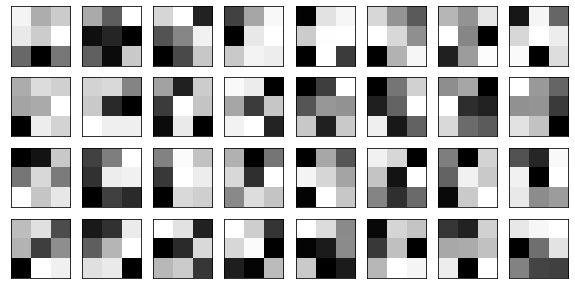

In [ ]:
f, axes = plt.subplots(4,8, figsize=(10,5))

weights, biases = model.layers[2].get_weights()

axes = axes.reshape(-1)
for i in range(32):
    axes[i].imshow(weights[:,:,0,i],cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

On the otherhand, its important to know what we're getting wrong. Lets construct the confusion matrix to discern which images the network has the hardest time classifying.

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

313/313 [==============================] - 3s 7ms/step


<Axes: >

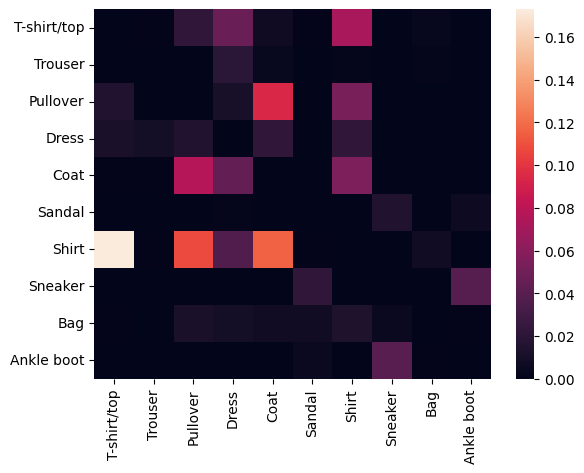

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_hat = np.argmax(model.predict(X_test),axis=1)
conf_mx = confusion_matrix(y_test, y_hat)

## Remove diagonal for better viewing
row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

sns.heatmap(nconf_mx, xticklabels=labels, yticklabels=labels)

## Transfer Learning: Using Pretrained Models

This section is taken directly from the _Pretrained Models_ section of _Chapter 14_ of Geron. The code is mostly taken from the notebook accompanying Chapter 14. Please use that section as a companion to the code below.

In this part of the  lab, we want to use the weights of a pretrained model to construct a new classifier. In this case, the pretrained model we will use is Xception model (https://arxiv.org/abs/1610.02357), with weights trained on the Imagenet dataset. We will use a data set of images of flowers from within tensorflow, and modify the output to classify flower types instead of the many label Imagenet categories.

First, we load the flowers dataset from the Tensorflow datasets library `tensorflow_datasets`. If you do not already have this library, you may need to install it using `pip install tensorflow_datasets` from the anaconda prompt.

#### Note: This part of the lab requires Tensroflow version 2.0.0. There is a problem with Tensorflow version 2.1.0 on the PC, you may need to downgrade to 2.0.0. (Maybe the problem already fixed.)

If you try to load the dataset and it dumps a bunch of random errors at you, downgrade to version 2.0.0 using

    pip uninstall tensorflow
    pip install tensorflow==2.0.0
    
   

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [ ]:
#import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

class_names = info.features["label"].names
print("Class Names:", class_names)
print(info)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /Users/liweizhang/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Class Names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/Users/liweizhang/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year 

The DatasetInfo dictionary contains a lot of information about the dataset. In this case we see that there are 3670 training images of various shapes and 5 classes. Finally, it tells us that the dataset has two "features", one called __images__ containing the images and one called __labels__, containing the labels.

The dataset is stored in a `DatasetV1Adapter` object, which is designed to hold datasets in standardized way that only allows certain kinds of manipulations. While it's not easy to access the data directly, the `DatasetV1Adapter` allows us to sample $n$ points from the data using `DatasetV1Adapter.take(n)`, or iterate over the entire dataset as we would iterate over a standard list.

Lets make a train test split using the `Dataset` functions:

In [ ]:
sp = ['train[:80%]', 'train[80%:90%]', 'train[90%:]']

(raw_train, raw_validation, raw_test) = tfds.load("tf_flowers", split=sp, as_supervised=True)
raw_train

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

We can sample a few images from the training data and display them with their labels. We use a for loop to iterate over the sample of the training data, saving out the image and the label:

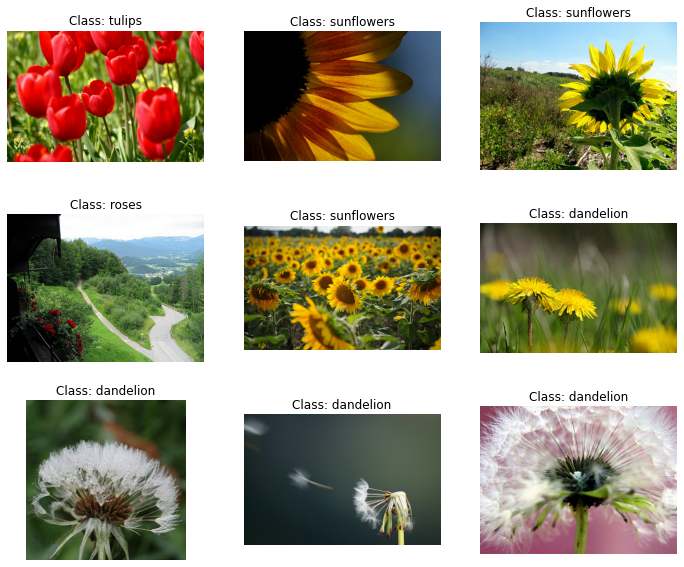

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
index = 0
for image, label in raw_train.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

The CNN expects $224\times 224$ dimensional input images, and if you look above you'll notice that not all of the images are the same size. Our solution will be to crop the images down to size using `tf.image.resize`. We then use the `keras.applications.xception.preprocess_input` function to preprocess the pictures. A preprocessing function often accompanies a pretrained network and it used to put the input into the format the network expects. For example, some networks expect greyscale images, some networks expect image scaled between [0,1], other between [-1,1], others use centered images that are otherwise not normalized.

There are a lot more data augmentation steps we could add to our preprocessing pipeline, including taking random cropings off our image, rotating, flipping or scaling the image. This is often helpful when you have a small training dataset. I will hold off on other preprocessing steps until the end of the lab.

In [ ]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

To apply our preprocessing function to the data we need to use the `DatasetV1Adapter.map(func)` command. This will apply the function `func` to each element of the `DatasetV1Adapter` object. We then shuffle the data, split it into batches for training. Finally, we tell Python to __prefetch__ the data. Prefetching loads the data into memory now and stores it there. Otherwise, Python may try to intelligently allocate the resources by only loading images when they are needed. This will drastically slow down training

In [ ]:
batch_size = 32
raw_train = raw_train.shuffle(1000)
raw_train = raw_train.map(preprocess).batch(batch_size).prefetch(1)
raw_validation = raw_validation.map(preprocess).batch(batch_size).prefetch(1)
raw_test = raw_test.map(preprocess).batch(batch_size).prefetch(1)

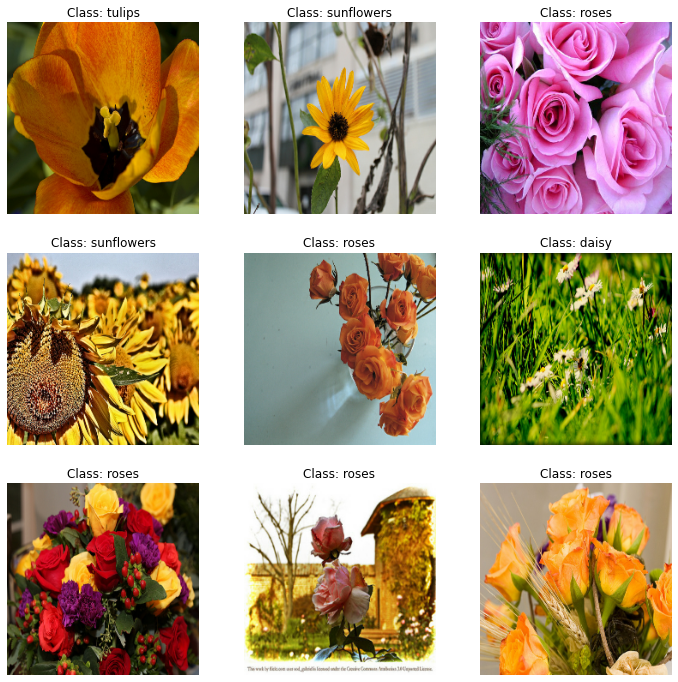

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in raw_train.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

Now we want to load the the Xception model and change it output dimension. We set `include_top=False` to remove the last two layers of the network: the global pooling layer and it's dense connection to the output layer. We will replace them with our own global pooling layer and output to our 5 classes.

For Keras, since we're not using a sequential network, when we add new layers we just have to tell the network which outputs to connect them to. This is done via

    NewLayer = tf.keras.layers.LAYERTYPE(Parameters)(OldLayer)
    
Using this syntax, we add a __global pooling layer__ and a __dense layer__ with 5 outputs, one for each class.

Note: The use of `tf.keras` forces keras to use the version compatible with the Tensorflow 2.0.0 backend, otherwise you will have errors.

In [ ]:
raw_train

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
n_classes = len(class_names)

base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

model.summary()

83697664/83683744 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                      

Finally, at first we don't want to train the all 20,871,725 parameters of the model, so we will freeze all of the layers we borrowed from Xception and only keep the weights of the last dense layer as trainable.

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

### Lets train the model. On a CPU it will take around 20 minutes per epoch.

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(raw_train, epochs=5, validation_data=raw_validation)

92/92 [==============================] - 205s 2s/step - loss: 0.9099 - accuracy: 0.8440 - val_loss: 0.5368 - val_accuracy: 0.8828


After 5 epochs our model is doing fairly well. If you would like you can now unfreeze the upper layers and have them train too. This will take a while but you can actually acheave accuray of up to 95%. Not bad for an afternoons work.

##### More pretrained models https://keras.io/api/applications/

# Problem 1: CNN classificaiton

###### Construct a CNN to classify the images in the MRI dataset.

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
## Load MRI dataset

# MRI folder path
data_path = '/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/MRI_Images/'

# Load target y
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/labels.csv")
y = labels["CDR"].values

# Load MRI images from the folder
X = []
for image_file in os.listdir(data_path):
    if image_file.endswith('.png'):
        image = plt.imread(os.path.join(data_path, image_file))
        # Normalize the image to the range [0, 1]
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        X.append(image)

X = np.array(X)

In [ ]:
X.shape

(609, 176, 176, 4)

In [ ]:
# Assuming X is your normalized image data
print("Minimum pixel value:", np.min(X))
print("Maximum pixel value:", np.max(X))


Minimum pixel value: 0.003921569
Maximum pixel value: 1.0


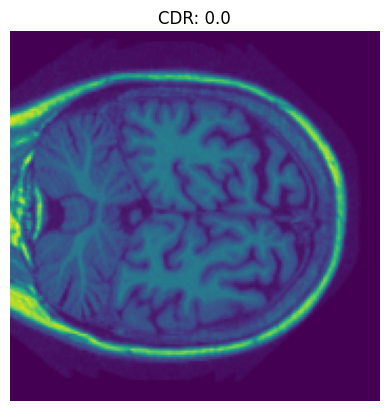

In [ ]:
# Choose image's index
image_index = 1 # change any index that you're interested

# Display MRI images
plt.imshow(X[image_index])

# Set title as corresponding target y
title = f"CDR: {y[image_index]}"

plt.title(title)
plt.axis('off')
plt.show()

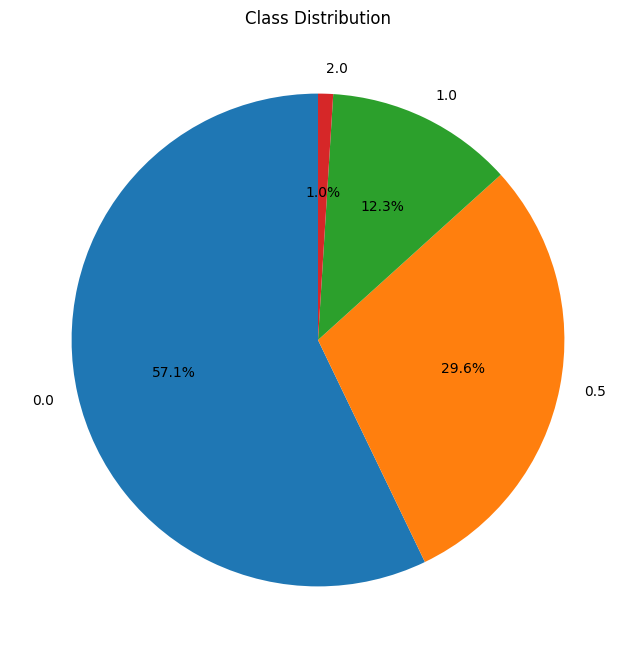

In [ ]:
import matplotlib.pyplot as plt

# Assuming y is your labels
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()



In [ ]:
import pandas as pd

# Assuming y is your labels
unique_classes, class_counts = np.unique(y, return_counts=True)

# Create a DataFrame
class_distribution_df = pd.DataFrame({'Class': unique_classes, 'Count': class_counts})

# Display the DataFrame
print(class_distribution_df)


   Class  Count
0    0.0    348
1    0.5    180
2    1.0     75
3    2.0      6


Unbalanced dataset, we can employ undersampling, oversampling, Synthetic sampling(SMOTE).

Build up CNN without preprocessing unbalanced dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Split train, valid, test set.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Obtain one-hot encoding y labels: y_train_onehot,  y_test_onehot
# Use keras.utils `to_categorical` convert labels to one-hot encoding
from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=4)  # change "num_classes" for predicted classes
y_valid_onehot = to_categorical(y_valid, num_classes=4)
y_test_onehot = to_categorical(y_test, num_classes=4)


# Print the shapes of the resulting sets
print("Train set shapes:", X_train.shape, y_train_onehot.shape)
print("Validation set shapes:", X_valid.shape, y_valid_onehot.shape)
print("Test set shapes:", X_test.shape, y_test_onehot.shape)


Train set shapes: (426, 176, 176, 4) (426, 4)
Validation set shapes: (91, 176, 176, 4) (91, 4)
Test set shapes: (92, 176, 176, 4) (92, 4)


In [ ]:
keras.backend.clear_session()
np.random.seed(76)
tf.random.set_seed(76)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(176, 176, 4)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
# model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)


# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 174, 174, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 87, 87, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [ ]:
# Train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data=(X_valid, y_valid_onehot))


Epoch 1/10
14/14 [==============================] - 38s 3s/step - loss: 2.0120 - accuracy: 0.7183 - val_loss: 0.5158 - val_accuracy: 0.8681
Epoch 2/10
14/14 [==============================] - 37s 3s/step - loss: 0.5632 - accuracy: 0.8615 - val_loss: 0.4124 - val_accuracy: 0.8681
Epoch 3/10
14/14 [==============================] - 35s 3s/step - loss: 0.4627 - accuracy: 0.8615 - val_loss: 0.4416 - val_accuracy: 0.8681
Epoch 4/10
14/14 [==============================] - 35s 3s/step - loss: 0.4631 - accuracy: 0.8615 - val_loss: 0.4174 - val_accuracy: 0.8681
Epoch 5/10
14/14 [==============================] - 34s 2s/step - loss: 0.4625 - accuracy: 0.8615 - val_loss: 0.3994 - val_accuracy: 0.8681
Epoch 6/10
14/14 [==============================] - 35s 3s/step - loss: 0.4553 - accuracy: 0.8615 - val_loss: 0.4060 - val_accuracy: 0.8681
Epoch 7/10
14/14 [==============================] - 35s 3s/step - loss: 0.4633 - accuracy: 0.8615 - val_loss: 0.4242 - val_accuracy: 0.8681
Epoch 8/10
14/14 [==

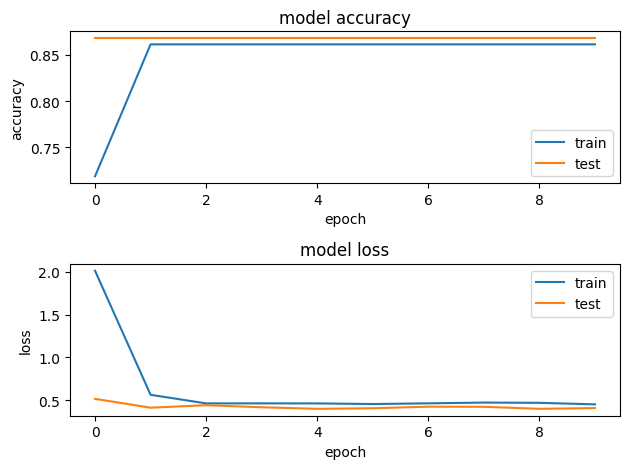

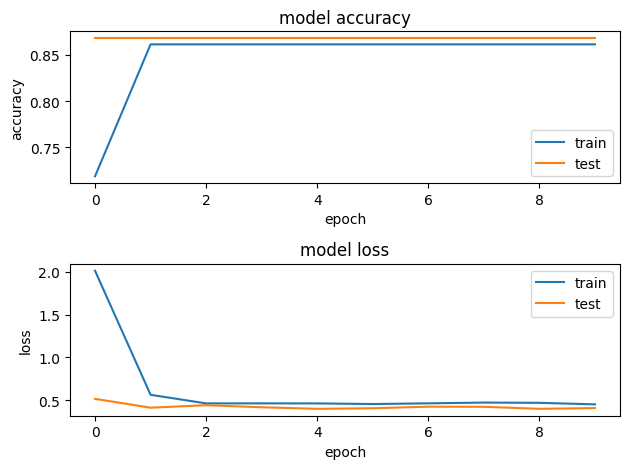

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print("Test Accuracy:", test_accuracy)

3/3 [==============================] - 2s 592ms/step - loss: 0.3691 - accuracy: 0.8913
Test Accuracy: 0.8913043737411499


1/1 [==============================] - 0s 47ms/step


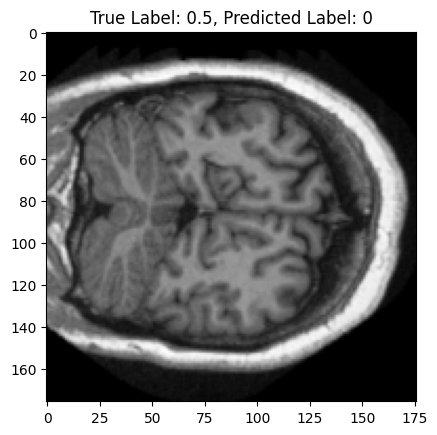

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select an index from the test set
random_index = np.random.randint(0, len(X_test))

# Get the corresponding image and label
test_image = X_test[random_index]
true_label = y_test[random_index]

# Reshape the image to match the model's input shape
test_image = test_image.reshape(1, 176, 176, 4)

# Make a prediction
predictions = model.predict(test_image)

# Get the predicted label
predicted_label = np.argmax(predictions)

# Display the image
plt.imshow(test_image[0, :, :, 1], cmap = "gray")
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
plt.show()


# Problem 2: Pretrained Networks


##### Construct a CNN using the Pretrained Network to classify the images in the MRI dataset.

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries and packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16 # VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model


In [ ]:
# Load MRU dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/MRI_Images/'
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/labels.csv")
y = labels["CDR"].values

X = []
for image_file in os.listdir(data_path):
    if image_file.endswith('.png'):
        image = plt.imread(os.path.join(data_path, image_file))
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        X.append(image)

X = np.array(X)


In [ ]:
# Import pretrained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Define output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [ ]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocessing data and normalized
X_train = np.array([tf.image.resize(image[:, :, :3], (32, 32)).numpy() for image in X_train])
X_valid = np.array([tf.image.resize(image[:, :, :3], (32, 32)).numpy() for image in X_valid])
X_test = np.array([tf.image.resize(image[:, :, :3], (32, 32)).numpy() for image in X_test])

X_train /= 255.0
X_valid /= 255.0
X_test /= 255.0


from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=4)  # change "num_classes" for predicted classes
y_valid_onehot = to_categorical(y_valid, num_classes=4)
y_test_onehot = to_categorical(y_test, num_classes=4)

In [ ]:
# Train model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_valid, y_valid_onehot))


Epoch 1/5
14/14 [==============================] - 44s 3s/step - loss: 0.5757 - accuracy: 0.8615 - val_loss: 0.4098 - val_accuracy: 0.8681
Epoch 2/5
14/14 [==============================] - 42s 3s/step - loss: 0.4563 - accuracy: 0.8615 - val_loss: 0.3976 - val_accuracy: 0.8681
Epoch 3/5
14/14 [==============================] - 46s 3s/step - loss: 0.4592 - accuracy: 0.8615 - val_loss: 0.4007 - val_accuracy: 0.8681
Epoch 4/5
14/14 [==============================] - 41s 3s/step - loss: 0.4533 - accuracy: 0.8615 - val_loss: 0.4024 - val_accuracy: 0.8681
Epoch 5/5
14/14 [==============================] - 45s 3s/step - loss: 0.4517 - accuracy: 0.8615 - val_loss: 0.4084 - val_accuracy: 0.8681


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print("Test Accuracy:", test_accuracy)


3/3 [==============================] - 2s 593ms/step - loss: 0.3583 - accuracy: 0.8913
Test Accuracy: 0.8913043737411499
